In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
from scipy.optimize import minimize

shape 342 548


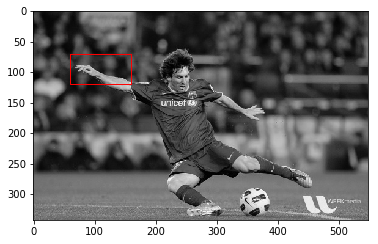

In [2]:
# import Messi
image = cv2.imread('./messi5.jpg')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray');
rows, cols = img.shape
print('shape', rows, cols)

# Define a box
x, y, w, h = 60, 70, 100, 50
box_polyline = np.array([[x, x+w, x+w, x, x],
                         [y, y, y+h, y+h, y]]).T
plt.plot(box_polyline[:, 0], box_polyline[:, 1],
         '-', color='red', linewidth=1, label='box');

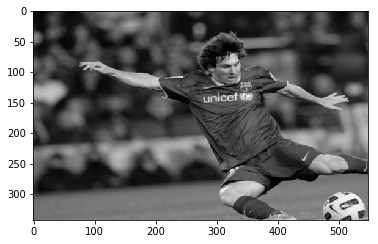

In [60]:
# Transform
rows,cols = img.shape

M = np.array([[  1.4,   0.1       ,   -30.],
              [ -0.1,  1.2        ,   -15.]])
 
img2 = cv2.warpAffine(img, M, (cols,rows),
                    flags=cv2.INTER_LINEAR)#INTER_CUBIC)
# borderMode=cv2.BORDER_TRANSPARENT, 
plt.imshow(img2, cmap='gray');

In [82]:
# I box
M = np.array([[ 1., 0., -x],
              [ 0., 1., -y]])
 
I_box = cv2.warpAffine(img, M, (w, h),
                   flags=cv2.INTER_LINEAR)#INTER_CUBIC)

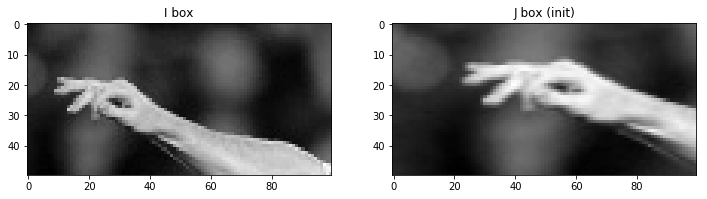

In [83]:
# J box init
M = np.array([[ 1.1, 0., -x],
              [ 0., 1., -y]])
 
J_init = cv2.warpAffine(img2, M, (w, h),
                    flags=cv2.INTER_LINEAR)#INTER_CUBIC)

# Graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(I_box, cmap = 'gray');
ax1.set_title('I box');
ax2.imshow(J_init, cmap = 'gray');
ax2.set_title('J box (init)');

In [63]:

def normalize(I):
    return (I - I.mean())/I.std()

def znssd(I, J):
    """Zero-normalized sum of squared differences (ZNSSD)"""
    return np.sum( (normalize(I) - normalize(J))**2 )

In [80]:
# test
znssd(I_box, J_init)

930.4482817313389

In [65]:
def opti_fun(M_flat, I, J_full):

    M = M_flat.reshape(2, 3)

    shape = I.T.shape
    J_transformed = cv2.warpAffine(J_full, M, shape,
                                   flags=cv2.INTER_LINEAR) #INTER_CUBIC)
    
    return znssd(I, J_transformed)

In [79]:
# Minimize
M_init = np.array([[ 1., 0., -x],
                   [ 0., 1., -y]]).flatten()

res = minimize(opti_fun, M_init,
               args=(I_box, img2), options={'disp':True}, method='Nelder-Mead')#'Nelder-Mead')

Optimization terminated successfully.
         Current function value: 884.716716
         Iterations: 239
         Function evaluations: 441


[[ 7.00758972e-01  5.70496891e-03 -4.48977016e+01]
 [-3.09760572e-03  1.04023198e+00 -6.80822480e+01]]


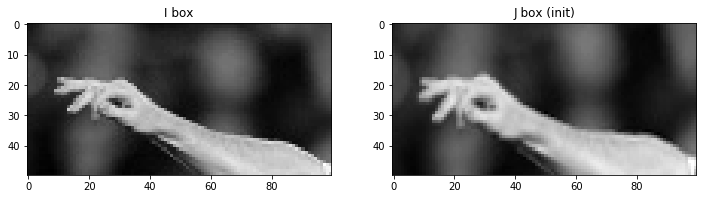

In [78]:
# Solution
M_opt = res.x.reshape(2, 3)
print(M_opt)

J_tr = cv2.warpAffine(img2, M_opt, (w, h),
                    flags=cv2.INTER_CUBIC)#INTER_CUBIC)

# Graph
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.imshow(normalize(I_box), cmap = 'gray');
ax1.set_title('I box');
ax2.imshow(normalize(J_tr), cmap = 'gray');
ax2.set_title('J box (init)');